# Sieci konwolucyjne

Matriał tego wykładu jest częściowo inspirowany materiałami: http://cs231n.github.io/convolutional-networks/ autorstwa Andreja Karpathy (http://cs.stanford.edu/people/karpathy/)

# Co nieco o obrazach i filtrach

## Splot


In [1]:
import matplotlib.pylab as plt
import numpy as np
from scipy.ndimage import convolve

A = np.array([[17, 24,  1,  8, 15],[23, 5, 7, 14, 16 ],[4,6,13,20,22],[10,12,19,21,3],[11,18,25,2,9]  ])
h = np.array([[8,1,6],[3,5,7],[4,9,2]])
D = convolve(A,h)

print('A= ')
print(A)
print('h_obrocone_0_180=')
print(np.rot90(np.rot90(h)))
print('D = ')
print(D)
print('D[1,3] = 1*2 + 8*9 +15*4 +  7*7 + 14*5 + 16*3  +  13*6 + 20*1 + 22*8 = ')
print(1*2 + 8*9 +15*4 +  7*7 + 14*5 + 16*3  +  13*6 + 20*1 + 22*8)

A= 
[[17 24  1  8 15]
 [23  5  7 14 16]
 [ 4  6 13 20 22]
 [10 12 19 21  3]
 [11 18 25  2  9]]
h_obrocone_0_180=
[[2 9 4]
 [7 5 3]
 [6 1 8]]
D = 
[[760 695 435 410 615]
 [650 595 410 575 755]
 [505 440 555 620 705]
 [445 585 600 765 590]
 [565 730 685 675 260]]
D[1,3] = 1*2 + 8*9 +15*4 +  7*7 + 14*5 + 16*3  +  13*6 + 20*1 + 22*8 = 
575


In [2]:
h = [[0, 1, 0],
     [1, 1, 1],
     [0, 1, 0]]

D = convolve(A,h)
print(D[2,2])
print(7+ 6 +13 +20+19)

65
65


Obrazy są reprezentowane przez macierze:
- dla obrazu w odcieniach szarości wystarczy macierz o rozmiarach wys x szer piksli
- dla obrazu kolorowego potrzebujemy dla każdego z kanałów barwnych (np. R - czerwony, G - zielon, B - niebieski) macierz wys x szer piksli, którą można złożyć w trójwymiarową kostkę: wys x szer x 3

Przyjrzyjmy się prostym operacjom licznia splotu obrazu z pewną mniejszą macierzą, którą będziemy nazywać filtrem.



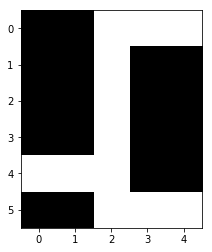

In [3]:
wej = np.array([[0, 0, 1, 1, 1],
                [0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0],
                [1, 1, 1, 0, 0],
                [0, 0, 1, 1, 1]]
                )


plt.imshow(wej, cmap ='gray')
plt.show()

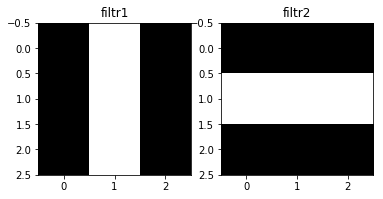

In [4]:
filtr1 = np.array([[0,1,0],
                   [0,1,0],
                   [0,1,0]])

filtr2 = np.array([[0,0,0],
                   [1,1,1],
                   [0,0,0]])

plt.subplot(1,2,1)
plt.imshow(filtr1, cmap ='gray')
plt.title('filtr1')

plt.subplot(1,2,2)
plt.imshow(filtr2, cmap ='gray')
plt.title('filtr2')
plt.show()

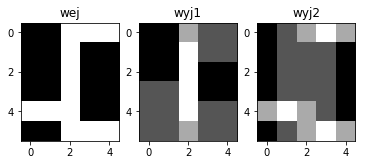

[[0 0 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 0 0]
 [0 0 1 1 1]]
[[0 1 0]
 [0 1 0]
 [0 1 0]]
[[0 0 2 1 1]
 [0 0 3 1 1]
 [0 0 3 0 0]
 [1 1 3 0 0]
 [1 1 3 1 1]
 [1 1 2 1 1]]


In [5]:
wyj1 = convolve(wej, filtr1, mode='constant', cval=0.0)
wyj2 = convolve(wej, filtr2, mode='constant', cval=0.0)

plt.subplot(1,3,1)
plt.imshow(wej, cmap ='gray')
plt.title('wej')

plt.subplot(1,3,2)
plt.imshow(wyj1, cmap ='gray')
plt.title('wyj1')

plt.subplot(1,3,3)
plt.imshow(wyj2, cmap ='gray')
plt.title('wyj2')
plt.show()
print(wej)
print(filtr1)
print(wyj1)

## Zobaczmy jak rozmiar filtra wpływa na wynik:
Testowy obrazek

(480, 640)


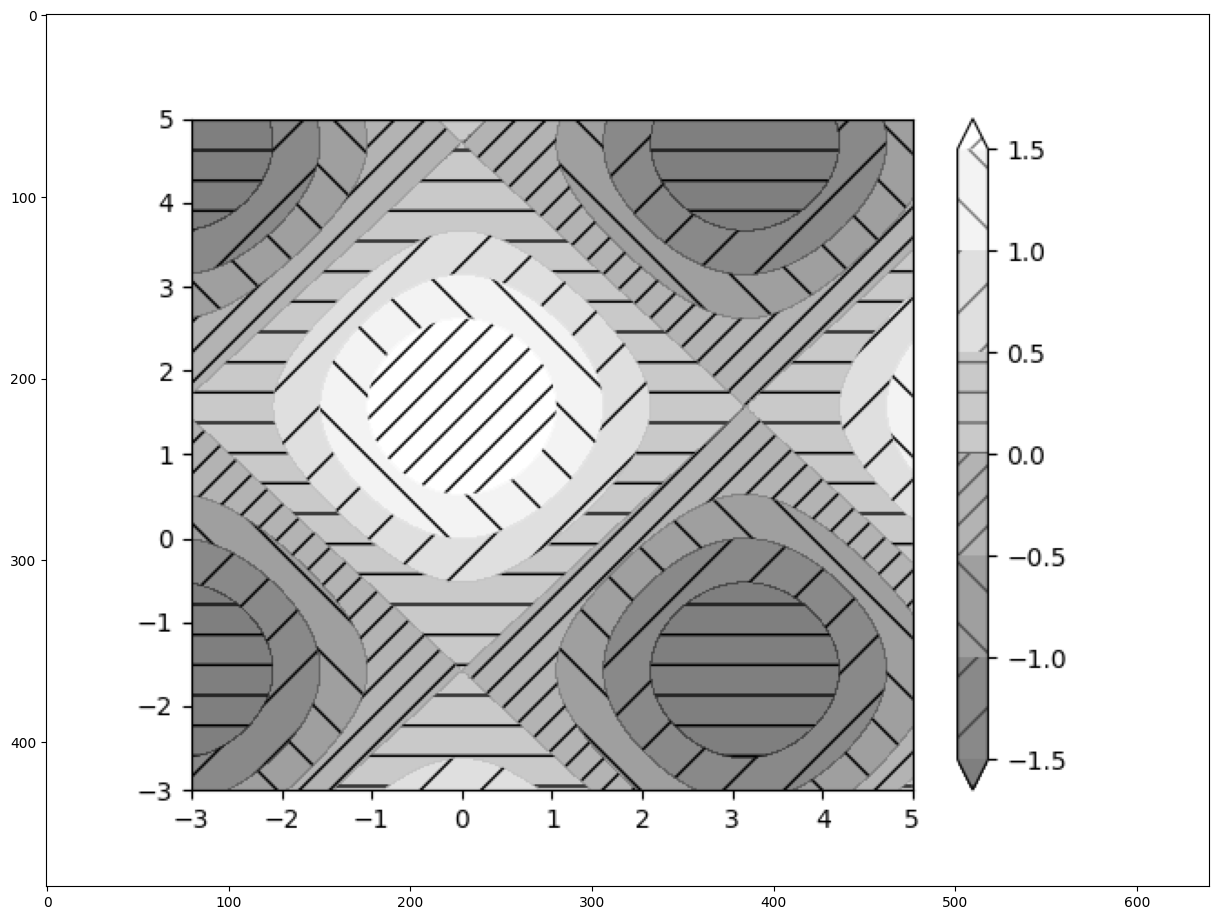

In [4]:
img= plt.imread('sphx_glr_contourf_hatching_001.png')
print(img.shape)
plt.figure(figsize = (15,15))
plt.imshow(img, cmap ='gray')
plt.show()

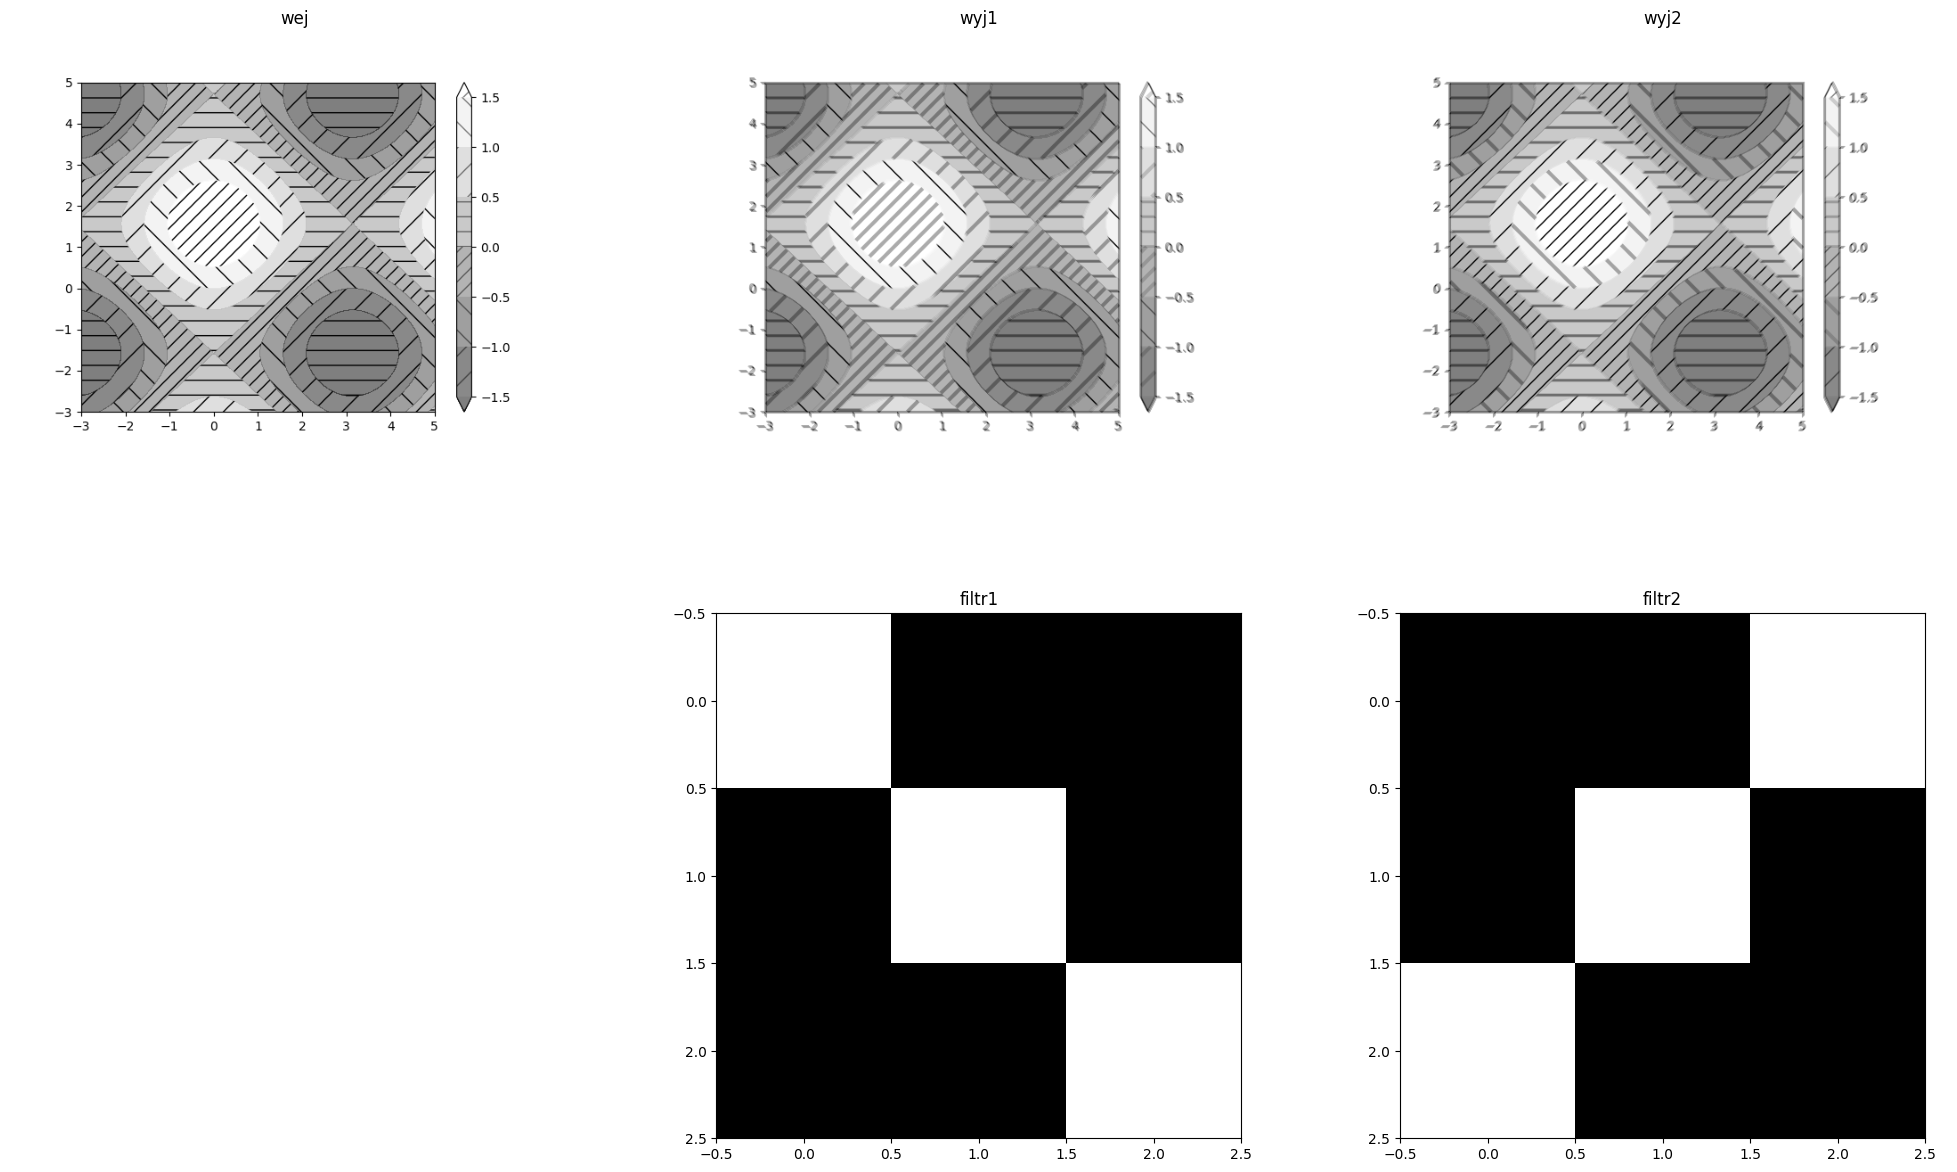

In [11]:
rozmiar_filtra = 3

filtr1 =np.eye(rozmiar_filtra,k=0)
filtr2 = np.fliplr(filtr1)
wyj1 = convolve(img, filtr1, mode='constant', cval=1.0)
wyj2 = convolve(img, filtr2, mode='constant', cval=1.0)

plt.figure(figsize= [25, 15])
plt.subplot(2,3,1)
plt.imshow(img, cmap ='gray')
plt.axis('off')
plt.title('wej')

plt.subplot(2,3,2)
plt.imshow(wyj1, cmap ='gray')
plt.axis('off')
plt.title('wyj1')

plt.subplot(2,3,3)
plt.imshow(wyj2, cmap ='gray')
plt.title('wyj2')
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(filtr1, cmap ='gray')
plt.title('filtr1')
plt.subplot(2,3,6)

plt.imshow(filtr2, cmap ='gray')
plt.title('filtr2')
plt.show()

# Skąd brać dobre filtry dla danego problemu?
- Można by je wytrenować w procesie uczenia!

ucznie "płytkie" vs "głębokie"

# Konwolucyjne sieci neuronowe (CNNs / ConvNets)

* Sieci konwolucyjne są bardzo podobne do warstwowych sieci neuronowych, o których była mowa na ostatnich wykładach.
 * składają się z neuronów
 * neurony mają wagi, które można modyfikować algorytmem uczącym
 * neuron oblicza swoje pobudzenie jako iloczyn skalarny wektora wejść i wektora wag
 * pobudzenie może być przekształcone nieliniowo zgodnie z funkcją aktywacji
 * efektywnie sieć realizuje pewne odwzorowanie z przestrzeni liczb opisujących kolor piksli obrazka w przestrzeń nazw klas obiektów reprezentownanych przez te obrazki
 
> To co jest szczególne w sieciach konwolucyjnych to, że pierwotnie były konstruuowane z założeniem, że na wejście podawany jest obraz. 

* będzie to miało przełożenie na architekturę sieci i sposób łączenia warstw.

## Architektura

### Dla przypomnienia,  zwykła sieć:
* dostaje na wejściu wektor, 
* przekształca go przepuszczając przez kolejne warstwy ukryte, w których każdy neuron jest w pełni połączony z neuronami warstwy poprzedniej. 
* neurony danej warstwy przetwarzaja informację niezależnie od siebie i nie mają wspólnych wag. 
* ostatnia warstwa, jest warstwą wyjściową i jej wyjścia interpretujemy np. jako prawdopodobieństwa przynależności do klas (w przypadku softmax)

![](http://cs231n.github.io/assets/nn1/neural_net2.jpeg)

### Problem ze skalowalnością:
Rozważmy przykładowo zdjęcia z bazy CIFAR-10, 
* mają one rozmiar $32\times32\times3$ (32 szer., 32 wys., 3 kanały RGB), 
  * jeden neuron standardowy miałby $32*32*3 = 3072$ wag. To jeszcze jest do ogarnięcia :)
  https://www.cs.toronto.edu/~kriz/cifar.html
  
* ale już dla obrazków np. $200\times200\times3$, mielibyśmy $200*200*3 = 120,000$ wag. 
* aby mieć użyteczną sieć takich neuronów potrzeba więcej niż jeden i liczba wag się sumuje.
> to bardzo szybko prowadzi do problemu przeuczenia

### Struktura sieci konwolucyjnej
* sieci ConvNet mają neurony zorganizowane w 3 wymairową strukturę: szerokość, wysokość, głębokość (przy czym głębokość to nie jest liczba warstw ukrytych )
  * np. wspomniany już przykładowy obrazek z bazy CIFAR-10 odpowiadałby wymiarom  $32\times32\times3$ (32 szer., 32 wys., 3 kanały RGB). 
* neuron w danej warstwie jest połączony tylko z niewielką liczbą neuronów w warstwie poprzedzającej. 
* każda warstwa przekształca objętość wejściową w objętość wyjściową (na końcu mamy np. $1\times1\times10$ klas reprezentujących cyferki)

![A ConvNet arranges its neurons in three dimensions (width, height, depth), as visualized in one of the layers. Every layer of a ConvNet transforms the 3D input volume to a 3D output volume of neuron activations. In this example, the red input layer holds the image, so its width and height would be the dimensions of the image, and the depth would be 3 (Red, Green, Blue channels).
A ConvNet is made up of Layers. Every Layer has a simple API: It transforms an input 3D volume to an output 3D volume with some differentiable function that may or may not have parameters.](http://cs231n.github.io/assets/cnn/cnn.jpeg)
  


### Spojrzenie statyczne
* Możemy myśleć, że:
  * warstwa CONV na danej swojej głębokości ma neurony, które mają ten sam filtr na wejściu, ale każdy "patrzy" przez ten filtr na nieco inny fragment objętości wejściowej
  * na kolejnych głębokościach warstwy CONV są neurony wyposażone w inne filtry 
  * neurony w kolejnych głębokościach, które patrzą na ten sam fragment przestrzeni wejściowej tworzą kolumnę (włókno)

![](http://cs231n.github.io/assets/cnn/depthcol.jpeg)
Na czerwono objętość wejściowa  (np.: obrazek 32x32x3 CIFAR-10 ), i zanurzony w jej fragmencie filtr varstwy CONV. Każdy neuron w warstwie CONV jest połączony tylko z lokalnym fragmentem objętości wejściowej i z całą głębokością tej objętości. W wymiarze głębokości warstwy CONV są neurony (tu 5) które "patrzą" na ten sam fragment objętości wejściowej, każdy przez swój filtr.

![](http://cs231n.github.io/assets/nn1/neuron_model.jpeg)
Pojedynczy neuron. Działą tak samo jak w klasycznej sieci neuronowej.

## Warstaw konwolucyjna

### Spojrzenie dynamiczne: 
* warstwa CONV to zestaw filtrów przestrzennych, które można uczyć.
* każdy taki filtr składa się z małej macierzy 3D (w wymiarach przestrzennych jest to kilka piksli szer. i kilka wys. oraz trzeci wymiar to głębokość). Dla warstwy wejściowej może to być np.: 5x5x3.
  * przykładowe filtry otrzymane w wyniku uczenia przez [Krizhevsky et al.](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks) w architekturze która wygrała ImageNet challenge w 2012
<img src="https://cs231n.github.io/assets/cnn/weights.jpeg">

* obliczenia wyglądają tak: 
  * fitr przesuwamy po wymiarach przestrzennych (wys. i szer.) objętości 
  * w każdej pozycji filtra obliczamy iloczyn skalarny tego filtra z przekrytym w tej pozycji fragmentem objętości wejściowej. 
  __Innymi słowy: obliczmy splot (konwolucję) filtra z objętością wejściową__
  <img src="https://miro.medium.com/max/1000/1*GcI7G-JLAQiEoCON7xFbhg.gif">
  

  * dany filtr produkuje na wyjściu macierz 2D odpowiadającą swojej aktywacji dla wszystkich położeń w objętości wejściowej. (ta aktywacja mierzy na ile to co w danym miejscu objętości wejściowej się znajduje jest podobne do cechy reprezentowanej przez ten filtr, może to być np. linia o konkretnym kierunku, krawędź, plama jakiegoś koloru itp.) 
  
  

  * te 2D mapy aktywacji od poszczególnych filtrów są składane w objętość 3D poprzez ułożenie ich w stos wzdłuż wymiaru głębokości (stąd w naszym przykładzie z obrazkiem 32x32x3 na wejściu i 12 filtrach objętość zwracana przez warstwę CONV jest 32x32x12)
  
 <img src="https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png" alt="By Aphex34 - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=45679374">
 
 

[Demo](https://cs231n.github.io/convolutional-networks/#:~:text=architectures%20section%20below.-,Convolution%20Demo.,-Below%20is%20a)

# Przykład sieci klasyfikującej obrazki

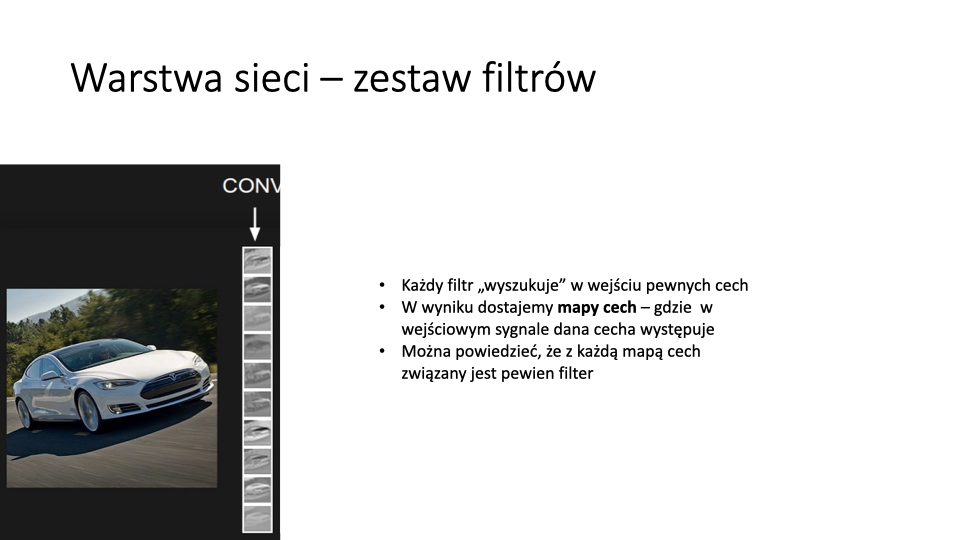

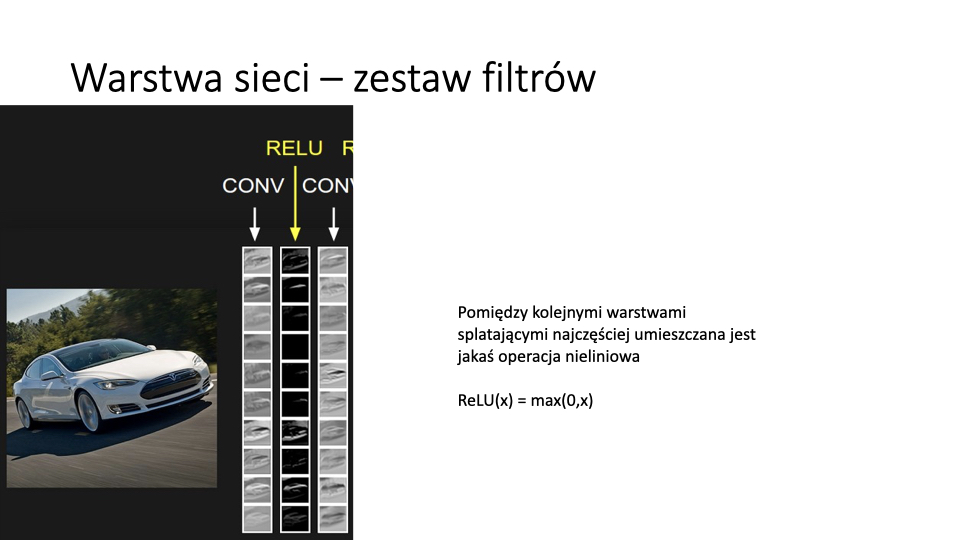

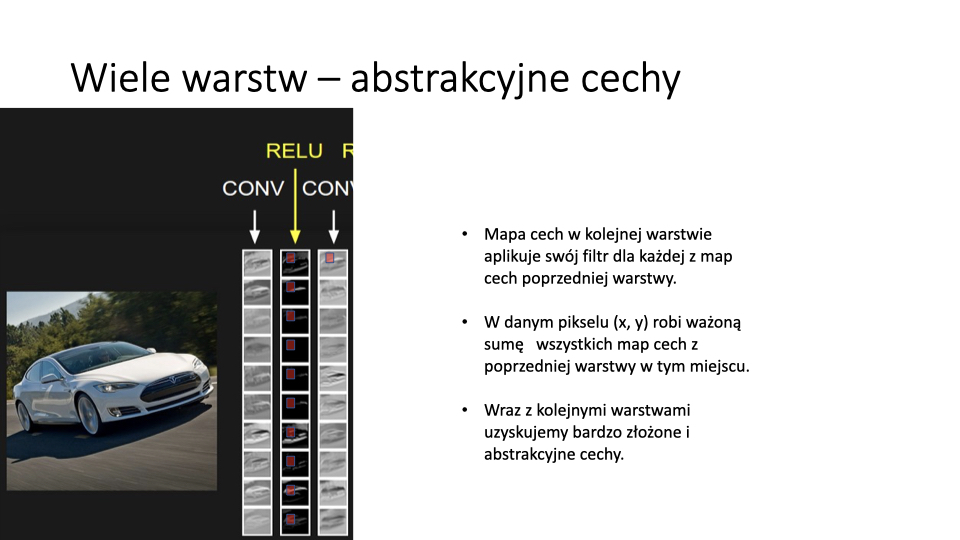

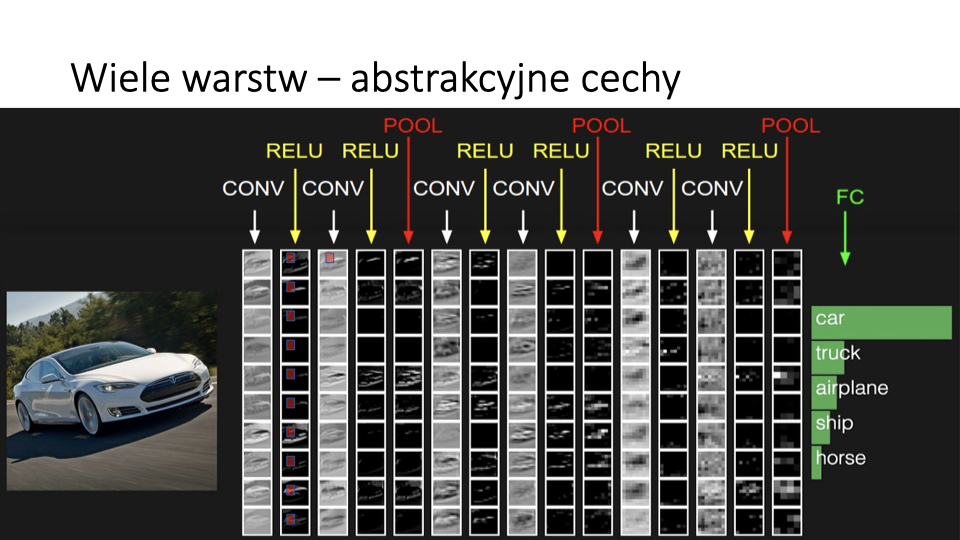

![The activations of an example ConvNet architecture. The initial volume stores the raw image pixels (left) and the last volume stores the class scores (right). Each volume of activations along the processing path is shown as a column. Since it's difficult to visualize 3D volumes, we lay out each volume's slices in rows. The last layer volume holds the scores for each class, but here we only visualize the sorted top 5 scores, and print the labels of each one. The full web-based demo is shown in the header of our website. The architecture shown here is a tiny VGG Net, which we will discuss later.](http://cs231n.github.io/assets/cnn/convnet.jpeg)

Zauważmy, że niektóre warstwy mają parametry:
* CONV/FC mają wagi podlegające uczeniu  

Inne zaś nie mają:
* RELU/POOL implementują stałą funkcję. 

Wagi w warstwach CONV/FC podlegają uczeniu gradientowemu.

### Warstwy, z których buduje się  ConvNets

Prosta sieć ConvNet jest sekwencją warstw. Typowo stotsowane są następujące warstwy:
* warstwa konwolucyjna (CONV)
* warstwa zwężająca (Pooling Layer, POOL)
* warstwa w pełni połączona (FC - fully-connected)


Przykładowa prosta sieć  ConvNet do klasyfikacji CIFAR-10 mogłąby mieć architkturę:

[INPUT - CONV - RELU - POOL - FC]. 

Gdzie:

* INPUT: macierz o rozmiarach $[32\times32\times3]$ przechowuje wartość $32 \times 32$ piksle w 3 kanałach R,G,B  
* CONV: warstwa neuronów, z których każdy połączony jest z lokalnym fragmente wejścia, każdy oblicza iloczyn skalarny swoich wag z małym regionem objętości wejściowej. Jeśli byśmy się zdecydowali na 12 **filtrów** to na wyjściu mielibyśmy objętość [$32\times32\times12$].
* RELU: warstwa, która aplikuje funkcję prostowniczą $ \max(0,x)$ do każdego elementu wejścia (dla naszego przykładu nadal mamy objętość wyjściową $[32\times32\times12]$).
* POOL: warstwa zwężająca wykonuje próbkowanie w wymiarach przestrzennych (wys. szer) (po takim zwężeniu mielibyśmy np. objętość $[16\times16\times12]$).
* FC (fully-connected) warstwa w pełni połączona, tzn. każdy neuron tej warstwy jest połączony z każdą komórką w objętości poprzedzającej. Dla CIFAR-10 wyjściem jest objętość $[1\times1\times10]$, gdzie te 10 liczb oznacza wyniki klasyfikacji do każdej z 10 klas bazy CIFAR-10.

### Połącznia:
* Lokalność połączeń: zauważmy, że warstwa CONV ma pewną asymetrię: 
  * połączenia w wymiarach przestrzennych są lokalne (mają wymiar filtra - "pola recepcyjnego")
  * w wymiarze głębokości mamy pełne połączenia do wszystkich głębokości objętości wejściowej

_Przykład 1_. Niech objętość wejściowa będzie $[32\times32\times3]$, (np. obraz RGB CIFAR-10). Jeśli rozmiary przestrzenne filtra są 5x5, to każdy neuron w warstwie CONV ma połączenia z regionem  $[5\times5\times3]$ w objętości wejściowej, czyli ma  `5*5*3 = 75` wag ( +1 na parametr obciążenia czyli 76 wag efektywnie). W rozmiarze głębokości musimy mieć połącznia o rozmiarze 3, bo taka jest głębokość objętości wejściowej.

_Przykład 2_. 
Niech objetość wejściowa ma $[16\times16\times20]$. Wówczas dla filtra o rozmiarze $3\times3$ każdy neuron w warstwie CONV ma  `3*3*20 = 180` połączeń. Znowu, połączenia przestrzenne są lokalne (np.: $3\times3$), ale sięgają przez pełną głębokość (20).

### Hiper-parametry warstwy CONV

* liczba kanałów wejścowych - (przez analogię z kanałami RGB w obrazkach) określa ile map cech (*feature maps*) było w objętości poprzedniej 
* liczba kanałów wyjściowych - ile różnych filtrów zostanie zastosowanych w tej warstwie (tyle map cech zostanie tu wytworzonych)
* __krok__: (stride) o ile piksli przeuniete są pola recepcyjne sąsiadujących ze soba filtrów 
* __dopełnianie zerami__: (padding) po to aby dało się obliczać filtr dochodząc do krawędzi objętości.

Możemy obliczyć rozmiar objętości wyjściowej jako funkcję następujących parametrów: 
* rozmiar objętości wejściowej $W$
* rozmiar pola recepcyjnego $F$
* kroku $S$
* liczby dodanych na brzegach zer $P$
liczba neuronów w warstwie CONV będzie:

$\qquad$ $(W−F+2P)/S+1$

Np. dla wejścia  $7\times7$ i rozmiaru filtra $3\times3$ z krokiem  1 i liczbą zer 0 dostalibyśmy wyjście $5\times5$. Dla kroku 2 dostalibyśmy wyjście rozmiaru $3\times3$. Ilustracja poniżej (Ilustracja wzdłóż osi x. po prawej wagi filtra - wszystkie neurony mają te same wagi): 
![](http://cs231n.github.io/assets/cnn/stride.jpeg)

## Zastosowanie dopełniania zerami
Dopełnianie zerami na brzegach  stosujemy po to aby wejście i wyjście mogły mieć ten sam rozmiar. W przykładzie powyżej brzegowe zera pełnią właśnie taką rolę.

W ogólności dopełnianie zerami powinno być ustawione tak:

$\qquad$ $P=(F−1)/2$

dla $S=1$, aby wejście i wyjście miały ten sam rozmiar.

## Ograniczenia na krok
Wielkość wejścia, pola recepcyjnego, dopełniania zerami i kroku są powiązane tak, aby całkowita liczba pól recepcyjnych zmieściła się w poszerzonej o brzegowe zera macierzy wejściowej.

### Przykład z życia:
Architektura zastosowana przez Krizhevsky et al., która zapewniła grupie zwycięstwo w konkursie  ImageNet w 2012:
* przyjmowała na wejściu obrazy o rozmiarze $[227\times227\times3]$. 
* W pierwszej warstwie konwolucyjnej użyto neurony z polami recepcyjnymi o rozmiarze $F=11$, z krokiem $S=4$ i brakiem dopełniania zerami $P=0$. 
* Ponieważ $ (227 - 11)/4 + 1 = 55$, oraz głębokość tej warstwy wynosiła $K=96$, to objętość wyjściowa z tej warstwy wynosiła $[55\times55\times96]$.
* Każdy z `55*55*96` neuronów w tej objętości był podłączony do regionu wejściowego o rozmiarach $[11\times11\times3]$.
* Ponadto wszystkie 96 neuronów w każdej z kolumn głębokościowych było podłączone do tego samego regionu wejściowego $[11\times11\times3]$, ale oczywiście z różnymi wagami. 

In [ ]:
11*11*3*96

34848

## Współdzielenie parametrów

* W powyższym przykładzie, gdyby każdy z neuronów łączył się z poprzedzającą objętością w sposób niezależny od pozostałych neuronów to dostalibyśmy  $55*55*96 = 290,400$ neuronów w pierwszej warstwie konwolucyjnej, a każdy z nich miałby $11*11*3 = 363$ wag i  1 parametr obciążenia. 
  * To razem daje $290400 * 364 = 105,705,600$ parametrów już na pierwszej warstwie!

* Liczbę parametrów można drastycznie ograniczyć wprowadzając jedno rozsądne założenie:
  * Jeśli jakaś cecha wyławiana z obrazu może być przydatna w lokalizacji $(x_1, y_1)$ to może ona być również użyteczna w lokalizacji $(x_2,y_2)$
    * Uwaga: powyższe założenie może nie być słuszne jeśli przetwarzane obrazy mają jakąś konkretną i ustaloną z góry geometrię (np. są to wycentrowane zdjęcia paszportowe - tu z góry wiadomo, że np. filtry wykrywające oczy nie są potrzebne w okoliczach "patrzących" na brodę). W takiej sytuacji lepsza może być sieć o pełnych lokalnych połączeniach.

  * Innymi słowy: neurony znajdujące się na tej samej głębokości mają takie same wagi  i obciążenia.
    * odpowiada to zresztą liczeniu splotu z filtrem: wagi neuronów znajdujących sie na tej samej głębokości to własnie ten filtr, a to że sąsiadujące neurony na tej samej głębokości mają ten sam zestaw wag odpowiada "przesówaniu filtra" w operacji splotu. 
  * efektywnie w naszym przykładzie, dzięki temu zabiegowi mamy  $96*11*11*3 = 34,848$ różnych wag i 96 parametrów obciążenia.
  * w czasie uczenia algorytmem wstecznej propagacji błędów każdy z neuronów będzie obliczał swoje gradienty, ale potem gradienty te są sumowane w ramach jednej głębokości i ta zsumowana wartość jest stosowana do uaktualniania jednego zestawu wag (w jednej głębokości: $11*11*3 +1= 364$)


<img src="http://cs231n.github.io/assets/cnn/weights.jpeg" width=1600>
Przykład filtrów wyuczonych przez Krizhevsky et al. 

Każdy z  96 filtrów jest rozmiaru[11x11x3], i każdy jest współdzielony przez $55*55$ neuronów na tej samej głębokości.

## Przykłady w numpy . 
Aby uczynić dotychczasowe rozważania bardziej konkretnymi przyjrzyjmy się jak te koncepcje można zaimplementować w pythonie.
* Załóżmy że wejście jest  tablicą numpy  `X`. Wówczas:
  * kolumna głębokościowa (włókno) w pozycji `(x,y)` będzie można zaindeksować tak: `X[x,y,:]`.
  

  * przkrój na konkretnej głębokości `d` to: `X[:,:,d]`.
  
  

## Przykład obliczeń w warstwie konwolucyjnej
Przypusćmy, że  `X` ma kształt `X.shape: (11,11,4)`. Załóżmy dalej, że nie mamy dopełniania zerami ($P=0$), że rozmiar fitra jest $F=5$ i krok jest $S=2$. W takim przypadku objętość wyjściowa ma rozmiary przestrzenne $ (11-5)/2+1 = 4$. Wyjściowa objętość (`V`) może być wówczas obliczana tak (pokazujemy tu tylko kilka elemetów):

`
V[0,0,0] = np.sum(X[:5,:5,:] * W0) + b0
V[1,0,0] = np.sum(X[2:7,:5,:] * W0) + b0
V[2,0,0] = np.sum(X[4:9,:5,:] * W0) + b0
V[3,0,0] = np.sum(X[6:11,:5,:] * W0) + b0
`
  * Uwaga: operator `*` działa elemnet po elemencie.
  * `W0` to wektor wag `W0.shape = (5,5,4)` a  `b0.shape = (1,1,1)` 
* Zauważmy, że:
  * w każdym przypadku obliczamy aktywację tak jak w zwykłych sieciach neuronowych  
  * współdzielenie wag.
  * indeksy w zerowym wymiarze wrastają co 2 - bo taki wybraliśmy krok.

* Aby obliczyć kolejny przekrój z aktywacjami mamy:

`V[0,0,1] = np.sum(X[:5,:5,:] * W1) + b1
V[1,0,1] = np.sum(X[2:7,:5,:] * W1) + b1
V[2,0,1] = np.sum(X[4:9,:5,:] * W1) + b1
V[3,0,1] = np.sum(X[6:11,:5,:] * W1) + b1
V[0,1,1] = np.sum(X[:5,2:7,:] * W1) + b1 (przykład przesunięcia się w stronę y)
V[2,3,1] = np.sum(X[4:9,6:11,:] * W1) + b1 (w kier. x i y)`
* Zauważmy, że:
  * mamy nowy zestaw wag  (`W1`)
* tak obliczane aktywacje są najczęściej przpuszczane elemnt po elemencie przez funkcję ReLu

# Podsumowanie
Warstaw konwolucyjna:
* przyjmuje objętości wejściowe o rozmiarach `W1×H1×D1`
* wymaga określienia 4 hiperparametrów:
  * Liczba filtrów: $K$
  * ich rozmiar przestrzenny: $F$
  * krok: $S$
  * ilość dodanych na brzegach zer: $P$
* produkuje objętości wyjściowe `W2×H2×D2` gdzie:
  * $W2=(W1−F+2P)/S+1$
  * $H2=(H1−F+2P)/S+1$
  * $D2=K$
* przy zastosowaniu współdzielenia parametrów wprowadza $F⋅F⋅D1$
wag na filtr. Łącznie $(F⋅F⋅D1)⋅K$ wag i $K$ obciążeń.
* objętość wyjściowa na głębokości $d$ jest obliczna poprzez splatanie objętości wejściowej z filtrem odpowiadającym głębokości $d$ z krokiem $S$.

Częstym wyborem jest `F=3,S=1,P=1`

# Implemetacja w postaci obliczeń macierzowych
* Jak już wcześniej wspominaliśmy, to co oblicza warstwa konwolucyjna to iloczyny skalarne filtrów z lokalnymi fragmentami objętości wejściowej.

* Operacje te można zapisać w postaci jednego mnożenia macierzowego:
  * loklane regiony objętości wejściowej są układane w kolumny (_operacja ta często jest nazywana_ `im2col`)
    * Np.: jeśli wejście jest rozmiaru `[227x227x3]` i ma być splatane z filtrami o rozmiarach `11x11x3` z krokiem 4, wówczas bierzemy z wejścia bloki piksli  o rozmiarach `[11x11x3]`   i układamy je w wektor kolumnowy o długości `11*11*3 = 363`.         
    * Iterowanie tego procesu z krokiem 4 daje  `(227-11)/4+1 = 55` lokalizacji w kierunku długości i szerokości. Wekotry kolumnowe z każdej iteracji (`55*55 = 3025`) układamy w kolumnach, jeden za drugim.
    * Ostatecznie wyjściowa macierz `X_col` ma rozmiar [363 x 3025].
      * Zauważmy, że ponieważ pola recepcyjne neuronów moga na siebie zachodzić, to te same elementy objętości wejściowej mogą się powtarzać w różnych kolumnach. 

 * Wagi warstwy CONV są analogicznie rozciągane do postaci wektorów.
   * Np.: jeśli mamy 96 filtrów o rozmiarach `[11x11x3]` to dostaniemy macierz `W_row` o rozmiarze `[96 x 363]`.
 * Obliczenie splotu odpowiada teraz jednemu mnożeniu macierzowemu: `np.dot(W_row, X_col)`, który wykonuje mnożenie każdego filtra przez każde pole recepcyjne. 
   * W naszym przykładzie dostaniemy w wyniku tej operacji macierz o rozmiarach `[96 x 3025]`. Każda komórka tej macierzy zawiera wynik iloczynu sklarnego jednego filtra z jedną lokalizacją. 
  * Ostatecznie wynik musi być zwinięty z powrotem do postaci objętości wyjściowej: `[55x55x96]`.

* Minusem tego podejścia są zwiększone wymagania co do pamięci, gdyż elementy z objętości wejściowej są duplikowane w wielu kolumnach.
* Plusem jest to, że istnieje wiele bardzo wydajnych implemetacji mnożenia macierzowego (np. BLAS). 
* Ponadto, ta sama idea rozciągania za pomocą `im2col` może też być efektywnie użyta w operacji zwężania, o której będzie za chwilę.

* Propagowanie błędu przez warstwę CONV też da się wyrazić w postaci splotu z przestrzennie odwróconymi filtrami.

1x1 convolution. As an aside, several papers use 1x1 convolutions, as first investigated by Network in Network. Some people are at first confused to see 1x1 convolutions especially when they come from signal processing background. Normally signals are 2-dimensional so 1x1 convolutions do not make sense (it’s just pointwise scaling). However, in ConvNets this is not the case because one must remember that we operate over 3-dimensional volumes, and that the filters always extend through the full depth of the input volume. For example, if the input is [32x32x3] then doing 1x1 convolutions would effectively be doing 3-dimensional dot products (since the input depth is 3 channels).

Dilated convolutions. A recent development (e.g. see paper by Fisher Yu and Vladlen Koltun) is to introduce one more hyperparameter to the CONV layer called the dilation. So far we’ve only dicussed CONV filters that are contiguous. However, it’s possible to have filters that have spaces between each cell, called dilation. As an example, in one dimension a filter w of size 3 would compute over input x the following: w[0]*x[0] + w[1]*x[1] + w[2]*x[2]. This is dilation of 0. For dilation 1 the filter would instead compute w[0]*x[0] + w[1]*x[2] + w[2]*x[4]; In other words there is a gap of 1 between the applications. This can be very useful in some settings to use in conjunction with 0-dilated filters because it allows you to merge spatial information across the inputs much more agressively with fewer layers. For example, if you stack two 3x3 CONV layers on top of each other than you can convince yourself that the neurons on the 2nd layer are a function of a 5x5 patch of the input (we would say that the effective receptive field of these neurons is 5x5). If we use dilated convolutions then this effective receptive field would grow much quicker.

# Warstwa zwężająca
* często pomiędzy warstwy CONV w architekturze ConvNet wkładane są warstwy zwężające.
* mają one na celu zmniejszenie liczby parametrów w sieci
* jest to narzędzie do zmniejszania ryzyka nadmiernego dopasowania
* Operacja zwężania działa na każdy przekrój objętościowy z osobna zmniejszając wymiary przestrzenne objętości. Wymiar głębokości nie ulega zmianie. 
* często wykorzystywaną operacją jest branie `max` z kwadratu o razmiarach `2x2`, przesuwanego z krokiem 2.
![](http://cs231n.github.io/assets/cnn/maxpool.jpeg)

### Bardziej ogólnie warstwa zwężająca:

* Przyjmuje objętość: $W_1 \times H_1 \times D_1$
* Wymaga dwóch hyperparametrów: 
  * Rozmiaru przestrzennego: $F$
  * Kroku: $S$
* zwraca objętości o rozmiarach: $W_2 \times H_2 \times D_2$ gdzie:
  * $W_2=\frac{W_1−F}{S}+1$
  * $H_2=\frac{H_1−F}{S}+1$
  * $D_2=D_1$

* Nie wprowadza do architektury parametrów podlegających estymacji
* Zwkle nie stosuje się dopełniania zerami.
* W praktyce stosowane są tylko dwie wersje zwężania:
  *  $F=3$, $S=2$ (zwężanie z zachodzeniem)
  * i znacznie bardziej popularne $F=2$, $S=2$
* Zwężanie o większy współczynnik okazuje sie zbyt destrukcyjne.

![](http://cs231n.github.io/assets/cnn/pool.jpeg)

### Inne wersje zwężania
* Próbowane były taże wersje, w których opercja stosowana przy zwężaniu była sumą lub  normą L2
* Jak dotąd w praktyce najlepiej sprawdzały się jednak warstyw stosujące `max` i `mean`

* w celu zmniejszania rozmiaru kolejnych warstw stosuje się również operację dylacji (dilated convolutions) - filtr w danej warstwie "patrzy" na rozrzedzoną wersję poprzedzającej warstwy (np. na co drugą komórkę)

<img src="https://miro.medium.com/v2/resize:fit:790/format:webp/0*oX5IPr7TlVM2NpEU.gif" >

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/0*3cTXIemm0k3Sbask.gif">


### Wsteczna propagacja
* dla operatora $\max(x,y)$ propagacja wsteczna polega na przekazaniu gradientu tylko temu neuronowi, który w propagacji do przodu miał największe wyjście.
* Zatem warto przechowywać gdzieś informację o tym, który neuron miał maksymalną aktywację.

### Pomijanie warstw zwężających
* Ostatnio w literaturze pojawiają sie doniesienia o tym, że warstwy zwężające nie są konieczne. Proponuje się aby liczbę parametrów zmniejszać np. poprzez zastosowanie większego kroku.
* W szczególności pomijanie tego typu warstw okazało się dawać dobre wyniki w modelach sieci stosowanych do generowania, np.
  * _variational autoencoders_ (VAE (https://arxiv.org/abs/1606.05908?context=stat.ML)) lub 
  * _generative adversarial networks_ (GAN (https://arxiv.org/abs/1406.2661)).

Normalization Layer

Many types of normalization layers have been proposed for use in ConvNet architectures, sometimes with the intentions of implementing inhibition schemes observed in the biological brain. However, these layers have since fallen out of favor because in practice their contribution has been shown to be minimal, if any. For various types of normalizations, see the discussion in Alex Krizhevsky’s cuda-convnet library API.

## Warstwa w pełni połączona
* ta warstwa jest budowana tak samo jak w standardowej sici neuronowej.

Converting FC layers to CONV layers

It is worth noting that the only difference between FC and CONV layers is that the neurons in the CONV layer are connected only to a local region in the input, and that many of the neurons in a CONV volume share parameters. However, the neurons in both layers still compute dot products, so their functional form is identical. Therefore, it turns out that it’s possible to convert between FC and CONV layers:

For any CONV layer there is an FC layer that implements the same forward function. The weight matrix would be a large matrix that is mostly zero except for at certain blocks (due to local connectivity) where the weights in many of the blocks are equal (due to parameter sharing).
Conversely, any FC layer can be converted to a CONV layer. For example, an FC layer with K=4096

 that is looking at some input volume of size 7×7×512
 can be equivalently expressed as a CONV layer with F=7,P=0,S=1,K=4096
. In other words, we are setting the filter size to be exactly the size of the input volume, and hence the output will simply be 1×1×4096
 since only a single depth column “fits” across the input volume, giving identical result as the initial FC layer.
FC->CONV conversion. Of these two conversions, the ability to convert an FC layer to a CONV layer is particularly useful in practice. Consider a ConvNet architecture that takes a 224x224x3 image, and then uses a series of CONV layers and POOL layers to reduce the image to an activations volume of size 7x7x512 (in an AlexNet architecture that we’ll see later, this is done by use of 5 pooling layers that downsample the input spatially by a factor of two each time, making the final spatial size 224/2/2/2/2/2 = 7). From there, an AlexNet uses two FC layers of size 4096 and finally the last FC layers with 1000 neurons that compute the class scores. We can convert each of these three FC layers to CONV layers as described above:

Replace the first FC layer that looks at [7x7x512] volume with a CONV layer that uses filter size F=7
, giving output volume [1x1x4096].
Replace the second FC layer with a CONV layer that uses filter size F=1
, giving output volume [1x1x4096]
Replace the last FC layer similarly, with F=1
, giving final output [1x1x1000]
Each of these conversions could in practice involve manipulating (e.g. reshaping) the weight matrix W
 in each FC layer into CONV layer filters. It turns out that this conversion allows us to “slide” the original ConvNet very efficiently across many spatial positions in a larger image, in a single forward pass.

For example, if 224x224 image gives a volume of size [7x7x512] - i.e. a reduction by 32, then forwarding an image of size 384x384 through the converted architecture would give the equivalent volume in size [12x12x512], since 384/32 = 12. Following through with the next 3 CONV layers that we just converted from FC layers would now give the final volume of size [6x6x1000], since (12 - 7)/1 + 1 = 6. Note that instead of a single vector of class scores of size [1x1x1000], we’re now getting and entire 6x6 array of class scores across the 384x384 image.

Evaluating the original ConvNet (with FC layers) independently across 224x224 crops of the 384x384 image in strides of 32 pixels gives an identical result to forwarding the converted ConvNet one time.
Naturally, forwarding the converted ConvNet a single time is much more efficient than iterating the original ConvNet over all those 36 locations, since the 36 evaluations share computation. This trick is often used in practice to get better performance, where for example, it is common to resize an image to make it bigger, use a converted ConvNet to evaluate the class scores at many spatial positions and then average the class scores.

Lastly, what if we wanted to efficiently apply the original ConvNet over the image but at a stride smaller than 32 pixels? We could achieve this with multiple forward passes. For example, note that if we wanted to use a stride of 16 pixels we could do so by combining the volumes received by forwarding the converted ConvNet twice: First over the original image and second over the image but with the image shifted spatially by 16 pixels along both width and height.

An IPython Notebook on Net Surgery shows how to perform the conversion in practice, in code (using Caffe)

## Architektury sieci ConvNet 

* Jak dotąd zaprezentowaliśmy główne typy warstw wykorzystywanych w konstrukcji sieci CnvNet.
* Podsumowując są to:
  * CONV: warstwa konwolucyjna, 
  * POOL: warstwa zwężająca 
  * FC: w pełni połączona
  * RELU: często wypisuję się ją jako oddzielną warstwę, która stosuje nieliniowość (funkcję prostowniczą) do każdego elementu poprzedzającej warstwy (najczęściej CONV) z osobna.
  
* Oprócz tegoczęsto stosuje się warstwy **dropout** i **batchnorm** - mają one znaczenie dla regularyzacji sieci więcej o tym za tydzień. 

### Układanie warstw

Najczęściej architektura sieci implementuje wzorzec:

`INPUT -> [[CONV -> RELU]*N -> POOL?]*M -> [FC -> RELU]*K -> FC`

gdzie: 
* `*` wskazuje powtórzenie wzorca 
* POOL? wskazuje opcjonalne wystąpienie warstwy zwężającej.
* Zwykle: `N >= 0` (i najczęśiej `N <= 3`), `M >= 0`, `K >= 0` (i najczęściej `K < 3`). 

Poniżej kilka typowych architektur:
* `INPUT -> FC`, to zwykły klasyfikator liniowy. Tu `N = M = K = 0`.
* `INPUT -> CONV -> RELU -> FC`
* `INPUT -> [CONV -> RELU -> POOL]*2 -> FC -> RELU -> FC`. Tu warstw `POOL` została umieszczona pomiędzy każdą parą `CONV->RELU`.
* `INPUT -> [CONV -> RELU -> CONV -> RELU -> POOL]*3 -> [FC -> RELU]*2 -> FC` . Tu wykonujemy sekwencję dwóch `[CONV->RELU]` przed zwężaniem. Taka sekwencja pozwala następujacym warstwom `[CONV->RELU]` na wytworzenie bardziej złożonych cech zanim zostaną one przerzedzone przez operacje zwężania.

### Większe filtry czy więcej warstw z małymi filtrami?

Załóżmy, że rozważamy zbudowanie trzech warstw `[CONV->RELU]` z filtrami $3 \times 3$:
 * każdy neuron w pierwszej warstwie `CONV` widzi fragment obrazu $3 \times 3$ 
 * neuron w drugiej warstwie  `CONV` widzi fragment $3\times3$ warstwy pierwszej, a więc $5\times5$ objętości wejściowej. 
 * podobnie neuron w trzeciej warstwie `CONV` widzi $3\times3$ warstwy drugiej, czyli  $7\times7$ objętości wejściowej.

Porównajmy to z użyciem jednej wartwy o filtrze rozmiaru $7\times7$. Rozwiązanie to ma kilka wad:
* neurony co prawda przetwarzają efektywnie ten sam fragment objętości wejściowej, ale tylko za pomoca operacji liniowej. -> wersja 3 warstwowa miała po drodze nieliniowości, które pozwalają na wytworzenie bardziej złożonych cech
* Załóżmy, że wszystkie warstwy miały tą samą głębokość $C$.
  * dla sieci jedno warstwowej oznacza to $C\times(7 \times 7 \times C)=49C^2$ parametrów
  * dla sieci trójwarstwowej dostaniemy: $3\times(C\times(3\times 3\times C))=27C^2$ parametrów.
  
Widzimy, że sieć z większą liczbą warstw i mniejszymi filtrami może wytwarzać bardziej złożone cechy przy mniejszej liczbie paramterów.

Potencjalną wadą jest większe wymaganie co do pamięci, gdyż jeśli chcemy stosować propagacje wsteczną to musimy przechowywać aktywację większej liczby jednostek.

### Inne podejścia
* pojawiają się prace z innymi architekturami niż liniowa sekwencja warstw: np. Google Inception,  Residual Networks od Microsoft Research Asia. W obu przypadkach zastosowano bardziej złożone wzorce architektoniczne.

### W praktyce:
W olbrzmiej ilości zastosowań nie trzeba budować i uczyć sieci ConvNet od zera. 

Dobrym pomysłem jest użycie jednego z aktualnie najlepszych modeli wytrenowanych na jakiejś dużej bazie danych, np. ImageNet, i douczenie tego modelu na danych z naszego zbioru uczącego

-> _"fine tuning"_,  

-> _"transfer learning"._



## Wzorce rozmiarów warstw
Rozważymy teraz wybór hiperparametrów. 

Jak na razie wyborem tych parametrów kierują zasady "spod  kciuka":

* Warstwa wejściowa (zawierająca obraz) powinna być wielokrotnie podzielna przez 2. Np.: 32 (CIFAR-10), 64, 96 (STL-10), or 224 (ImageNet), 384, lub 512.

* Warstwy CONV powinny mieć małe filtry ( $3\times3$ lub $5\times5$), z krokiem  $S=1$
* Dopełnianie zerami powinno być takie aby warstwa CONV nie zmieniała rozmiarów przestrzennych objętości wejściowej
  * Np.: jeśli  $F=3$ to  $P=1$ zachowa oryginalny rozmiar przestrzenny wejścia
  * jeśli $F=5$ to $P=2$
  * Ogólnie dla danego $F$  $P=(F−1)/2$ zachowuje rozmiar wejścia.
  
* Warstwa POOL mają za zadanie redukcję rozmiarów przestrzennych.
  * najczęściej używane są warstwy $\max$ z polami $2\times2$ ($F=2$) i z krokiem równym 2($S=2$) 
  * większe pola zwykle prowadzą do pogorszenia wyników

* Powyżej zaprezentowany schemat jest wygodny bo pozwala rozdzielić myślenie o splataniu od myślenia o redukcji rozmiarów przestrzennych.
* Dodawanie zer oprócz zachowywania rozmiarów ma też takie znaczenie, żeby informacja zawarta w brzegach obrazu nie zanikała zbyt szybko wraz z propagacją przez warstwy.
* Użycie filtra o rozmiarze 1 w warstwie CONV powoduje, że jej działanie polega na przekształcaniu wejścia w wymiarze głębokości.

### Kompromis pomiędzy rozmiarami a dostępną pamięcią:
* stosowanie małych filtrów wymaga większej pamięci. Np.: filtrowanie obrazu `224x224x3` za pomocą  trzech warstw `CONV` `3x3` z  64 filtrami i dopełnianiem zerami = 1 daje trzy objętości aktywacji o rozmiarze `[224x224x64]`. to daje około 10 milionów aktywacji czyli 72MB pamięci (na jeden obrazek do przechowania aktywacji i gradientów)
GPU mają ograniczone zasoby pamięci. Wymusza to stosowanie kompromisów. W praktyce te kompromisy stosuję się tylko w pierwszej warstwie CONV. Np.: ZF net: filtry `7x7` i krok 2 lub AlexNet filtry `11x11` i krok 4.

## Przykłady 
Jest kilka architektur, które były w pewnym momencie ważnymi osiągnięciami i mają swoje nazwy:
* __LeNet__. Pierwsza udana aplikacja sieci konwolucyjnej została zaprezentowania przez Yann LeCun w (http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf). Przetwarzanie ręcznie pisanych kodów pocztowych.
  
<img src="https://www.datasciencecentral.com/wp-content/uploads/2021/10/1lvvWF48t7cyRWqct13eU0w.jpeg">

* __AlexNet__. Praca popularyzująca sieci konwolucyjne w dziedzinie widzenia komputerowego. Stworzona przez zespół: Alex Krizhevsky, Ilya Sutskever i Geoff Hinton. AlexNet znacząco pokonał inne podejścia w konkursie   ILSVRC (ImageNet Large-Scale Visual Recognition Challenge http://www.image-net.org/challenges/LSVRC/) w 2012 (top-5: 16% błędów w porównaniu do 26% dla rozwiązania na 2-gim miejscu). 
Sieć była koncepcyjnie podobna do LeNet ale miała większą głębokość i miała warstwy CONV ułożone jedna za drugą. Wcześniejsze prace zawsze stosowały jedną warstwę konwolucyjna po której nastpowała warstwa POOL.

<img src="https://www.researchgate.net/publication/320052364/figure/fig1/AS:543136445198336@1506505227088/Scheme-of-the-AlexNet-network-used_W640.jpg" width = 1600>

**Uwaga:** co to jest dokładność 'top-5'. 
Nasz klasyfikator daje prawdopodobieństwo dla każdej klasy. Powiedzmy, że mieliśmy tylko klasy

„kot”, „pies”, „dom”, „mysz”, "auto", "drzewo" jako klasy (w tej kolejności). Następnie klasyfikator daje wynik np.:

 0,1; 0,2; 0,0; 0,7; 0,0; 0,0

Pierwszą klasą jest „mysz”. Top-2 klasy to {mysz, pies}. Gdyby poprawną klasą był „pies”, byłby liczony jako „poprawny” dla dokładności Top-2, ale jako nieprawidłowy dla dokładności Top-1. Dla top-5 badalibyśmy czy prawidłowa klasyfikacja znajduje się wśród 5 najwyżej zrangowanych predykcji.

* __ZF Net__. Zwycięzca konkursu ILSVRC 2013 była sieć konwolucyjna zaproponowana przez Matthew Zeiler i Rob Fergus. Była udoskonaleniem sieci AlexNet: powiększono środkową warstwę konwolucyjną i pomniejszono flitry i krok w pierwszej warstwie.

* __GoogLeNet__. Zwycięzca konkursu ILSVRC 2014 stworzona przez Szegedy et al. z Google. Jej głównym wkładem było wprowadzenie modułu  _Inception_ ( https://arxiv.org/pdf/1409.4842.pdf ), który drastycznie zmniejsza liczbę parametrów w sieci(4M, w porównamniu do 60M w  AlexNet). Dodatkowo zastosowano średnie zwężanie (Average Pooling) zamiast warstwy FC w ostatniej warstwie co dalej zmniejszało liczbę parametrów.


* __VGGNet__. Zdobywcą 2 miejsca w ILSVRC 2014 była sieć Karen Simonyan i Andrew Zisserman.  Jej głównym wkładem w rozwój wiedzy o sieciach było wykazanie, że głębokość sieci jest krytyczną cechą dla dobrych osiągów. 
Najlepsza wersja miała 16 warstw CONV/FC o bardzo jednorodnej strukturze: filtry $3 \times3$ i zwężanie $2\times2$.
Minusem tego rozwiązania jest bardzo duża liczba parametrów (140M). Większość z tych parametrów jest w pierwszej warstwie FC. W międzyczasie pokazano już, że tych warstw FC można się pozbyć bez straty dla jakości działania.

<img src="https://raw.githubusercontent.com/Masterx-AI/VGG-16_Implemenation/main/VGG16.png">


* __ResNet__. Residual Network (https://arxiv.org/abs/1512.03385) Opracowana przez Kaiming He et al. zwyciężyłą w ILSVRC 2015. Jej cechą jest specjalne pomijanie połączeń i silne stosowanie normalizacji batchowej (https://arxiv.org/abs/1502.03167).  Nie ma też FC na końcu sieci. 
<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/ResBlock.png">

## Porównanie różnych klasycznych architektur
<img src="https://www.researchgate.net/profile/Frank-Koss/publication/320084139/figure/fig2/AS:543716588744704@1506643544031/Comparison-of-popular-CNN-architectures-The-vertical-axis-shows-top-1-accuracy-on_W640.jpg">

W miarę aktualny przegląd: Survey of the Recent Architectures of Deep Convolutional Neural Networks: 
    
[A survey of the recent architectures of deep convolutional neural networks](https://rd.springer.com/article/10.1007%2Fs10462-020-09825-6)

Fig. 3 s.13

W miarę aktualne porównanie:
https://paperswithcode.com/sota/image-classification-on-imagenet


## VGGNet w szczegółach:

`INPUT: [224x224x3]  memory: 224*224*3=150K   weights: 0`

`CONV3-64: [224x224x64]  memory:  224*224*64=3.2M   weights (3*3*3)*64 = 1,728`

`CONV3-64: [224x224x64]  memory:  224*224*64=3.2M   weights: (3*3*64)*64 = 36,864`

`POOL2: [112x112x64]  memory:  112*112*64=800K   weights: 0`

`CONV3-128: [112x112x128]  memory:  112*112*128=1.6M   weights: (3*3*64)*128 = 73,728`

`CONV3-128: [112x112x128]  memory:  112*112*128=1.6M   weights: (3*3*128)*128 = 147,456`

`POOL2: [56x56x128]  memory:  56*56*128=400K   weights: 0`

`CONV3-256: [56x56x256]  memory:  56*56*256=800K   weights: (3*3*128)*256 = 294,912`

`CONV3-256: [56x56x256]  memory:  56*56*256=800K   weights: (3*3*256)*256 = 589,824`

`CONV3-256: [56x56x256]  memory:  56*56*256=800K   weights: (3*3*256)*256 = 589,824`

`POOL2: [28x28x256]  memory:  28*28*256=200K   weights: 0`

`CONV3-512: [28x28x512]  memory:  28*28*512=400K   weights: (3*3*256)*512 = 1,179,648`

`CONV3-512: [28x28x512]  memory:  28*28*512=400K   weights: (3*3*512)*512 = 2,359,296`

`CONV3-512: [28x28x512]  memory:  28*28*512=400K   weights: (3*3*512)*512 = 2,359,296`

`POOL2: [14x14x512]  memory:  14*14*512=100K   weights: 0`

`CONV3-512: [14x14x512]  memory:  14*14*512=100K   weights: (3*3*512)*512 = 2,359,296`

`CONV3-512: [14x14x512]  memory:  14*14*512=100K   weights: (3*3*512)*512 = 2,359,296`

`CONV3-512: [14x14x512]  memory:  14*14*512=100K   weights: (3*3*512)*512 = 2,359,296`

`POOL2: [7x7x512]  memory:  7*7*512=25K  weights: 0`

`FC: [1x1x4096]  memory:  4096  weights: 7*7*512*4096 = 102,760,448`

`FC: [1x1x4096]  memory:  4096  weights: 4096*4096 = 16,777,216`

`FC: [1x1x1000]  memory:  1000 weights: 4096*1000 = 4,096,000`

`TOTAL memory: 24M * 4 bytes ~= 93MB / image (only forward! ~*2 for bwd)`

`TOTAL params: 138M parameters`

As is common with Convolutional Networks, notice that most of the memory (and also compute time) is used in the early CONV layers, and that most of the parameters are in the last FC layers. In this particular case, the first FC layer contains 100M weights, out of a total of 140M.

# Uwaga o praktycznych ograniczeniach.
* Wąskim gardłem w konstrukcji sieci ConvNet jest dostępna na kartach GPU pamięć. GPUs mają ograniczneia 3/4/6GB najlepsze do  12GB (dedykowane do obliczeń do 80GB  w r. 2020). 

From the intermediate volume sizes: These are the raw number of activations at every layer of the ConvNet, and also their gradients (of equal size). Usually, most of the activations are on the earlier layers of a ConvNet (i.e. first Conv Layers). These are kept around because they are needed for backpropagation, but a clever implementation that runs a ConvNet only at test time could in principle reduce this by a huge amount, by only storing the current activations at any layer and discarding the previous activations on layers below.
From the parameter sizes: These are the numbers that hold the network parameters, their gradients during backpropagation, and commonly also a step cache if the optimization is using momentum, Adagrad, or RMSProp. Therefore, the memory to store the parameter vector alone must usually be multiplied by a factor of at least 3 or so.
Every ConvNet implementation has to maintain miscellaneous memory, such as the image data batches, perhaps their augmented versions, etc.
Once you have a rough estimate of the total number of values (for activations, gradients, and misc), the number should be converted to size in GB. Take the number of values, multiply by 4 to get the raw number of bytes (since every floating point is 4 bytes, or maybe by 8 for double precision), and then divide by 1024 multiple times to get the amount of memory in KB, MB, and finally GB. If your network doesn’t fit, a common heuristic to “make it fit” is to decrease the batch size, since most of the memory is usually consumed by the activations.


Additional Resources

Additional resources related to implementation:

Soumith benchmarks for CONV performance
ConvNetJS CIFAR-10 demo allows you to play with ConvNet architectures and see the results and computations in real time, in the browser.
Caffe, one of the popular ConvNet libraries.
State of the art ResNets in Torch7